#FETCHING DATASET

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x, y = mnist['data'], mnist['target']


# we have both data and target in the dataset so here we can do train and test

In [3]:
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

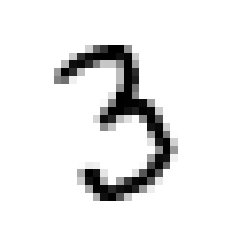

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x[30000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [6]:
y[3000]

'9'

In [7]:
x[30000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  4

In [8]:
import numpy as np
y=y.astype(np.uint8)

In [9]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [10]:
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
x_train[4].shape

(784,)

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd_clf=SGDClassifier(random_state=40)
model = sgd_clf.fit(x_train,y_train_4)

model

In [15]:
model

SGDClassifier(random_state=40)

In [16]:
model.predict([some_digit])

array([False])

In [17]:
model.predict(x_test)

array([False, False, False, ...,  True, False, False])

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
model = cross_val_score(sgd_clf,x_train,y_train_4,cv=4,scoring='accuracy')

In [20]:
model

array([0.97773333, 0.97406667, 0.97493333, 0.97546667])

it gave us 97 % accuracy lets see the dumb classifier 

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self,x ):
        return np.zeros((len(x), 1), dtype=bool)

In [22]:
# lets see this models accuracy

never_5 = Never5Classifier()
model2 = cross_val_score(never_5,x_train,y_train_4,cv=4,scoring='accuracy')

In [23]:
model2

array([0.90213333, 0.9028    , 0.9034    , 0.9022    ])

In [24]:
x_train.shape

(60000, 784)

In [25]:
y_train.shape

(60000,)

In [26]:
x_test.shape

(10000, 784)

In [27]:
y_test.shape

(10000,)

# confusion matrix

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)


In [29]:
y_train_pred

array([False, False,  True, ..., False, False, False])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52976,  1182],
       [  428,  5414]], dtype=int64)

In [31]:
y_train_perfect_predictions = y_train_4 # pretend we reached perfection
confusion_matrix(y_train_4, y_train_perfect_predictions)

array([[54158,     0],
       [    0,  5842]], dtype=int64)

In [32]:
#  Scikit-Learn provides several functions to compute classifier metrics, including preci‐
#  sion and recall:

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_4, y_train_pred)     #precision = tp/tp+fp   =  5414/5414+1182



0.8208004851425106

In [33]:
recall_score(y_train_4, y_train_pred)      # recall = tp/tp+fn    =   5414/5414+428


0.9267374186922287

# F1 score

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train_4,y_train_pred)

0.8705579675188937

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. 


 


In [36]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-13089.96278077])

In [37]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)


In [38]:
y_some_digit_pred

array([False])

In [39]:
 threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

raising the threshold decreases recall.

In [40]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3,
 method="decision_function")


In [41]:
y_scores

array([-30873.14577167, -25548.83273313,   4418.45908825, ...,
       -13599.27991214, -14104.28786081, -18773.61253856])

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

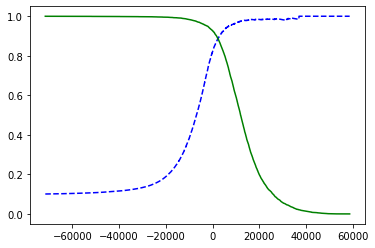

In [43]:
#Finally, you can plot precision and recall as functions of the threshold value using
#Matplotlib 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first true values

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [45]:
# To make predictions (on the training set for now), instead of calling the classifier’s
#predict() method, you can just run this code:

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [46]:
precision_score(y_train_4, y_train_pred_90)

0.9

In [47]:
 recall_score(y_train_4,y_train_pred_90)

0.8673399520712085

# The ROC Curve

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

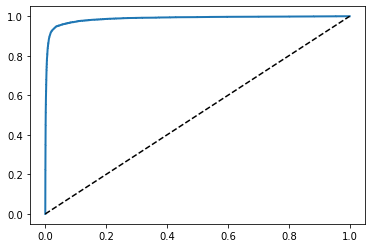

In [49]:
def plot_roc_curve(fpr, tpr, ):
 plt.plot(fpr, tpr, linewidth=2, )
 plt.plot([0, 1], [0, 1], 'k--')                # dashed diagonal
 [...]                # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)


0.9873455738486853

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_4, cv=3,
 method="predict_proba")

In [52]:
# But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
# use the positive class’s probability as the score:
    
    
y_scores_forest = y_probas_forest[:, 1]                      # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_4,y_scores_forest)


# Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare

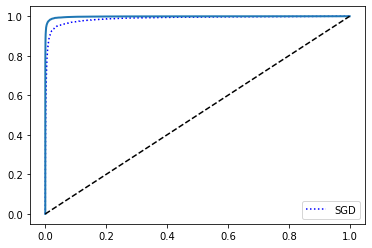

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, )
plt.legend(loc="lower right")
plt.show()

In [54]:
roc_auc_score(y_train_4, y_scores_forest)


0.9982278527638186

# Multiclass Classifcation

In [ ]:
 sgd_clf.fit(x_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
 np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_


In [ ]:
sgd_clf.classes_[4]

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
>>> ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
>>> ovo_clf.fit(x_train, y_train)
>>> ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_)

In [ ]:
#Training a RandomForestClassifier is just as easy:
>>> forest_clf.fit(x_train, y_train)
>>> forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [ ]:
x_train.shape

In [ ]:
#Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score()
#function:

cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

# Error Analysis

In [ ]:
 y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx